In [5]:
import utils_adder

import numpy as np 
import pandas as pd 
import glob


import data_convertor, processing 

In [6]:
berkly_tab = pd.read_csv('../data/data_berkley.csv')
piezo_tab = pd.read_csv('../data/data_piezo.csv')

print(piezo_tab.head())
berkly_tab.head()

                      names  label  \
0        normal_cond_220622      0   
1  normal_cond_10_35_230622      0   
2  normal_cond_11_41_230622      0   
3  normal_cond_12_41_230622      0   
4  normal_cond_13_44_230622      0   

                                              path  
0         ../data/piezo/00_outdoor_normal_cond.dat  
1   ../data/piezo/01_outdoor_normal_cond_10_35.dat  
2   ../data/piezo/02_outdoor_normal_cond_11_41.dat  
3   ../data/piezo/03_outdoor_normal_cond_12_41.dat  
4  ../data/piezo/04_outdoor_normal_cond_13_44.dat   


,names,label,path,logs_num
0,normal_cond_220622,0,../data/berkely/00_outdoor_normal_cond_220622/,14
1,normal_cond_10_35_11_30_230622,0,../data/berkely/01_outdoor_normal_cond_10_35_1...,11
2,normal_cond_12_41_16_20_230622,0,../data/berkely/02_outdoor_normal_cond_11_41_1...,56
3,normal_cond_16_55_18_00_230622,0,../data/berkely/03_outdoor_normal_cond_16_55_1...,12
4,normal_cond_10_38_11_40_240622,0,../data/berkely/04_outdoor_normal_cond_10_38_1...,11


In [7]:
# Piezo dataset 

piezo_path =  piezo_tab.path[0]


piezo_data = data_convertor.read_dat(path= piezo_path)

In [8]:
piezo_data

,Ts,N.A,Velocity,CH0,CH1
0,0.01,0.0,0.0,-0.001157,0.002822
1,0.02,0.0,0.0,-0.000158,0.002104
2,0.03,0.0,0.0,0.000431,0.001235
3,0.04,0.0,0.0,0.000409,0.000337
4,0.05,0.0,0.0,0.001051,-0.000249
...,...,...,...,...,...
461339,4602.32,0.0,0.0,0.000165,0.000175
461340,4602.33,0.0,0.0,0.000054,0.000005
461341,4602.34,0.0,0.0,0.000178,0.000133
461342,4602.35,0.0,0.0,0.000040,-0.000003


In [10]:
len(berkly_tab.path)

15

# This Conversion is done

## txt to csv Conversion 
for i in range(0, len(berkly_tab.path)):
    print(f'Converting {berkly_tab.names[i]}\n')
    src_path = berkly_tab.path[i]
    logs = berkly_tab.logs_num[i]
    tag = berkly_tab.label[i]
    for j in range(0,logs+1):
        logger = j
        l_df = data_convertor.read_txt(path=src_path, label= tag, log_num = logger)
        data_convertor.from_df_to_csv(l_df, src_path, logger)

In [42]:
# Concatanating csv logs and validate them 

path = path.path[1]
ldf = [pd.read_csv(p) for p in glob.glob(path + "*.csv")]
df_berk  = pd.concat(ldf1).sort_values(by=['logger', 'ts'])
processing.g_conversion(df_berk)
processing.mean_center(df_berk, loc = ['x', 'y'])

df_berk

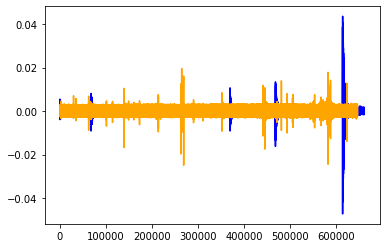

In [7]:
#%matplotlib notebook
import matplotlib.pyplot as plt 
conv = 2/(2**15) 
plt.figure()
plt.plot(df_berk.x.values, color = 'blue')
plt.plot(piezo_data.CH1, color = 'orange')
plt.show()

In [10]:
 
fft_berk = processing.fft_(df_berk.y.values , 104)  
fft_piezo = processing.fft_(piezo_data.CH0.values, 100)

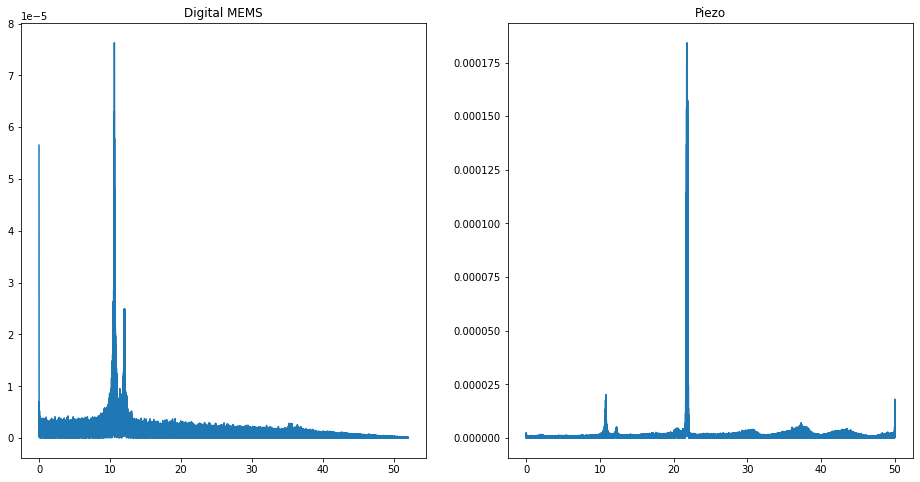

In [13]:
import matplotlib.pyplot as plt 
f = plt.figure(figsize=(16,8))

plt.subplot2grid( (1,2) , (0,0), fig = f)

plt.plot(fft_berk['frequency'], fft_berk['fft_'])
plt.title("Digital MEMS")


plt.subplot2grid( (1,2) , (0,1) , fig = f)
plt.plot(fft_piezo['frequency'], fft_piezo['fft_'])
plt.title("Piezo")
plt.show()

#### for 00_indoor_noraml_cond: <br />
    - CH0 == y-axis f_peak = 10.23 
    - CH1 == x-axis f_peak = 2.85, 8.xx
 

In [ ]:
# Modify the dataFrames to be totally similar 

# Store the Datasets in the csv format in a separate file ... 
